In [608]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as plt2 

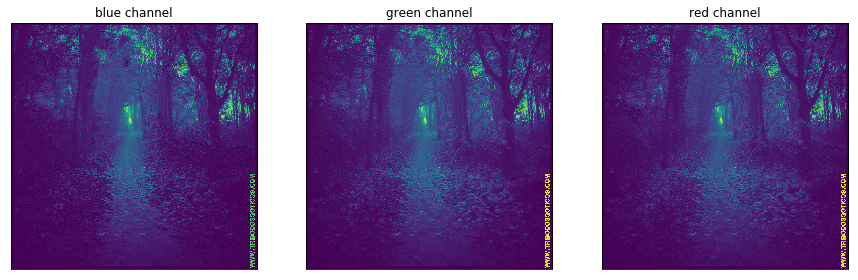

In [609]:
img = cv.imread('05.jpg')
#img = cv.resize(img, (200,100))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

r, g, b = cv.split(img)

plt.figure(figsize=(15,15))

plt.subplot(131),plt.imshow(b)
plt.title('blue channel'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(g)
plt.title('green channel'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(r)
plt.title('red channel'), plt.xticks([]), plt.yticks([])

plt.show()

In [610]:
hist_b = cv.calcHist([img], [2], None, [256], [0,256])
hist_g = cv.calcHist([img], [1], None, [256], [0,256])
hist_r = cv.calcHist([img], [0], None, [256], [0,256])


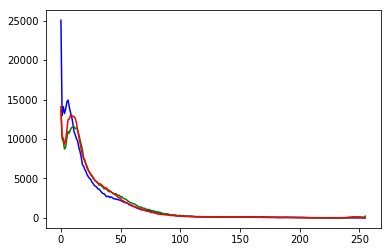

In [611]:
plt.plot(hist_b, color='b')
plt.plot(hist_g, color='g')
plt.plot(hist_r, color='r')
#plt.plot(hist_teste,color='g')
plt.show()

In [612]:
im_RG = cv.hconcat([r,g])
im_RB = cv.hconcat([r,b])
im_GB = cv.hconcat([g,b])


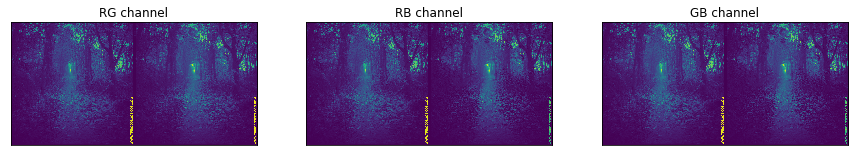

In [613]:
plt.figure(figsize=(15,15))

plt.subplot(131),plt.imshow(im_RG)
plt.title('RG channel'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(im_RB)
plt.title('RB channel'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(im_GB)
plt.title('GB channel'), plt.xticks([]), plt.yticks([])

plt.show()

In [614]:
hist_conc_RG = cv.calcHist([im_RG], [0], None, [256], [0,256])
hist_conc_RB = cv.calcHist([im_RB], [0], None, [256], [0,256])
hist_conc_GB = cv.calcHist([im_GB], [0], None, [256], [0,256])

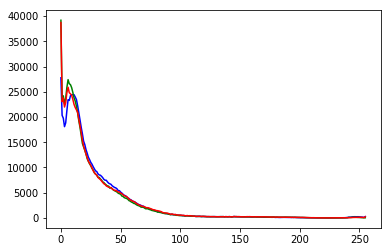

In [615]:
plt.plot(hist_conc_RG, color='b')
plt.plot(hist_conc_RB, color='g')
plt.plot(hist_conc_GB, color='r')
#plt.plot(hist_teste,color='g')
plt.show()

In [616]:
#acumulada_RG = np.dot((hist_conc_RG/(np.sum(hist_conc_RG))),np.tril(np.ones((256,256))))
acumulada_RG = np.zeros((256,1))
acumulada_RB = np.zeros((256,1))
acumulada_GB = np.zeros((256,1))

tot_pixel = np.sum(hist_conc_RG)

In [617]:
for i in range (256):
    acumulada_RG[i] = hist_conc_RG[i] + acumulada_RG[i-1]
    acumulada_RB[i] = hist_conc_RB[i] + acumulada_RB[i-1]
    acumulada_GB[i] = hist_conc_GB[i] + acumulada_GB[i-1]    

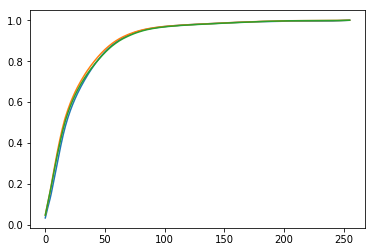

In [618]:
acumulada_RG = acumulada_RG/tot_pixel
acumulada_RB = acumulada_RB/tot_pixel
acumulada_GB = acumulada_GB/tot_pixel

plt.plot(acumulada_RG)
plt.plot(acumulada_RB)
plt.plot(acumulada_GB)


In [619]:
img_out = np.zeros((img.shape[0],img.shape[1],3))
print(img_out.shape)
L = 256**3

(640, 640, 3)


In [620]:
for i in range (img.shape[0]):
    for j in range (img.shape[1]):
        RG = acumulada_RG[img[i,j,0]] * acumulada_RG[img[i,j,1]]
        RB =  acumulada_RB[img[i,j,0]] * acumulada_RB[img[i,j,2]]
        GB = acumulada_GB[[img[i,j,1]]] * acumulada_GB[img[i,j,2]]
        
        Cx = RG*RB*GB
        
        Ry = img[i,j,0]
        Gy = img[i,j,1]
        By = img[i,j,2]
        
        error = 1
        
        while error >= 0.001:
            Cy = (Ry+1)*(Gy+1)*(By+1)/L
            
            #if Ry<255 and error>0: Ry = Ry+1
            #elif (Ry>0 and error<0): Ry = Ry-1
            
            Ry = Ry + int(Ry<255 and error>0) - int(Ry>0 and error<0)
            Gy = Gy + int(Gy<255 and error>0) - int(Gy>0 and error<0)
            By = By + int(By<255 and error>0) - int(By>0 and error<0)
            error = Cx-Cy
        
        img_out[i,j,0] = Ry
        img_out[i,j,1] = Gy
        img_out[i,j,2] = By

(<matplotlib.axes._subplots.AxesSubplot at 0x7f58705cc550>,
 <matplotlib.image.AxesImage at 0x7f5870590128>)

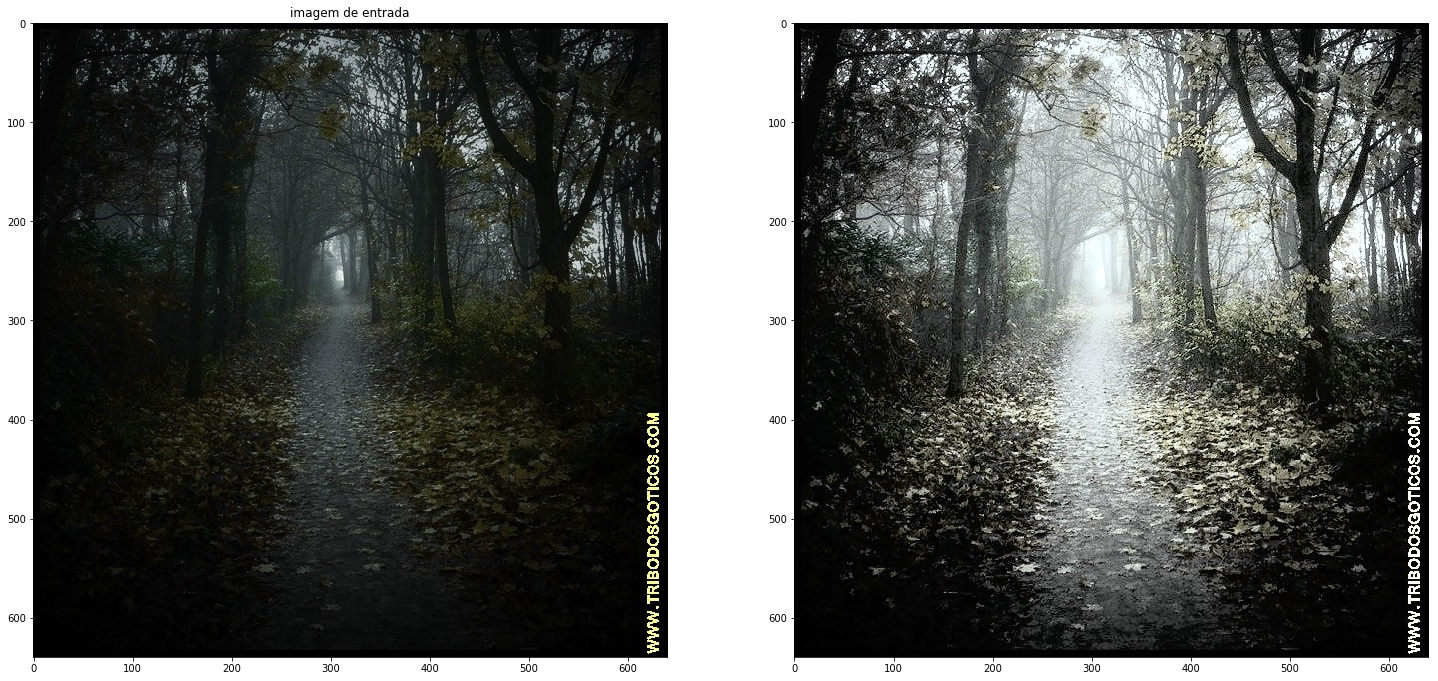

In [621]:
plt.figure(figsize=(25,25))
plt.axis('off')

plt.subplot(121),plt.imshow(img)
plt.title('imagem de entrada')
plt.subplot(122),plt.imshow(img_out.astype('uint8'))
#plt.title('imagem equalizada')


#plt.show()

In [622]:
img_out = img_out.astype('uint8')
hist_R = cv.calcHist([img_out], [0], None, [256], [0,256])
hist_G = cv.calcHist([img_out], [1], None, [256], [0,256])
hist_B = cv.calcHist([img_out], [2], None, [256], [0,256])

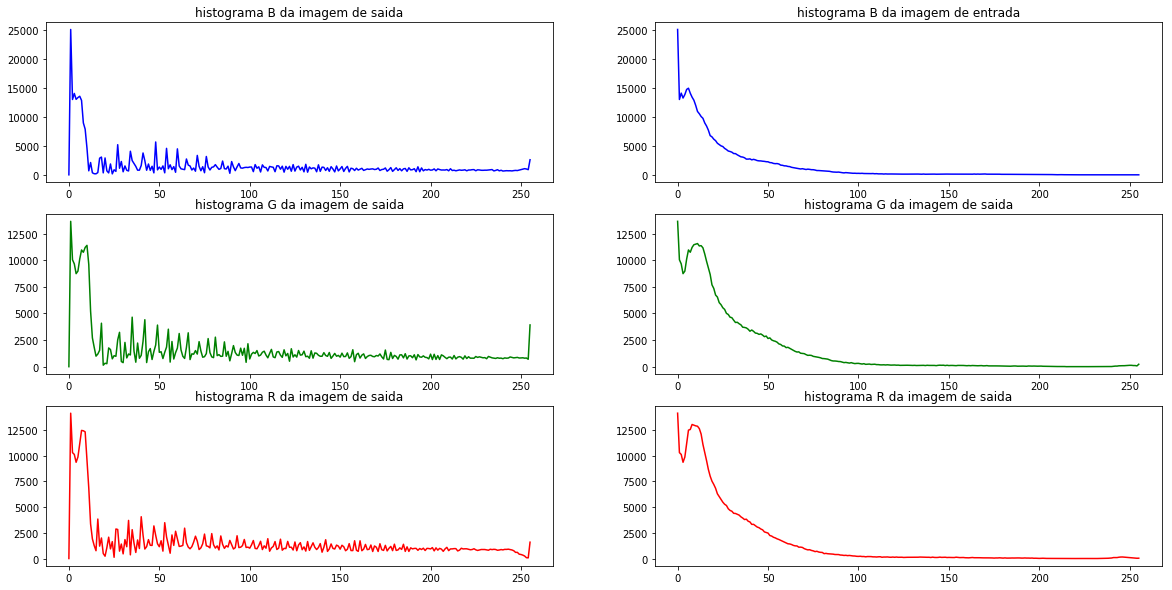

In [640]:
plt.figure(figsize=(20,10))


plt.subplot(321)
plt.plot(hist_B, color='b')
plt.title('histograma B da imagem de saida')

plt.subplot(322)
plt.plot(hist_b, color='b')
plt.title('histograma B da imagem de entrada')

plt.subplot(323)
plt.plot(hist_G, color='g')
plt.title('histograma G da imagem de saida')

plt.subplot(324)
plt.plot(hist_g, color='g')
plt.title('histograma G da imagem de saida')

plt.subplot(325)
plt.plot(hist_R, color='r')
plt.title('histograma R da imagem de saida')

plt.subplot(326)
plt.plot(hist_r, color='r')
plt.title('histograma R da imagem de saida')
plt.show()